# **GANS -Hands on MNIST**

**First step importing the libraries step by step as when need and before use so to unsewrstand the flow better.**
First i have included basic ones. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

I have used **tensorflow** for implementing the dcgan.

In [2]:
import tensorflow as tf

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Then i will load the dataset ,in this case it is **mnist dataset**.

In [3]:
from tensorflow.keras.datasets import mnist

For making the dcgan model I don't need the testing and training data OR If i want i could just have combined  (xtrain + xtest) data so to make dataset longer but xtrain is enough for now.

In [4]:
(xtrain,_),(_,_)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Need to **check shape** ->not because we always do but rather important here as we deal with images we need to 
understand and get knowledge about the number of channels as well as width and height.

In [5]:
xtrain.shape

(60000, 28, 28)

(60000, 28, 28)-> **(no of images,width,height,no of channels)**

Here,

no of images=60000

width=height=28

no of channnels=?? ->not given i.e 1
!!->channel not included ->we need to reshape.

In [6]:
xtrain=xtrain.reshape((60000, 28, 28,1))

In [7]:
xtrain.shape

(60000, 28, 28, 1)

Now, we can visualize some images from our dataset to see our **goal->to generate similar images**, we must at least know what we are to generate.

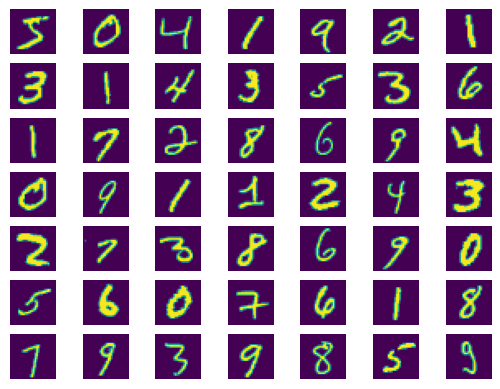

In [8]:
for i in range(49):
    plt.subplot(7,7,i+1)
    plt.imshow(xtrain[i])
    plt.axis('off')
plt.show()

We can see the first image data below range as we know is between 0 to 255.

In [9]:
xtrain[0]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

Also the dtype is int.
Normally we scale values between 0 and 1.But **in case of dcgan everywhere it is recommended to scale between -1 and 1**.

So to scale between -1 and 1 we can subtract 127.5 and devide the result by 127.5.
Also since we are dealing with devisions and float values we might **convert** the dtype of data from int **to float** as well.

In [10]:
xtrain=xtrain.astype(float)

In [11]:
xtrain.dtype

dtype('float64')

In [12]:
xtrain=(xtrain-127.5)/127.5

In [13]:
xtrain

array([[[[-1.],
         [-1.],
         [-1.],
         ...,
         [-1.],
         [-1.],
         [-1.]],

        [[-1.],
         [-1.],
         [-1.],
         ...,
         [-1.],
         [-1.],
         [-1.]],

        [[-1.],
         [-1.],
         [-1.],
         ...,
         [-1.],
         [-1.],
         [-1.]],

        ...,

        [[-1.],
         [-1.],
         [-1.],
         ...,
         [-1.],
         [-1.],
         [-1.]],

        [[-1.],
         [-1.],
         [-1.],
         ...,
         [-1.],
         [-1.],
         [-1.]],

        [[-1.],
         [-1.],
         [-1.],
         ...,
         [-1.],
         [-1.],
         [-1.]]],


       [[[-1.],
         [-1.],
         [-1.],
         ...,
         [-1.],
         [-1.],
         [-1.]],

        [[-1.],
         [-1.],
         [-1.],
         ...,
         [-1.],
         [-1.],
         [-1.]],

        [[-1.],
         [-1.],
         [-1.],
         ...,
         [-1.],
         [

Now we need to break the problem to understand it, these codes i found from different places and did some experiments and changes.

Aim is to generate the Gan model which can generate similar images to our given mnist data.
This is done by using game theory.
We train two different models. 
1)Discriminator
2)Generator
These will fight like tom and cherry (jerry), light yagami(serial killer and protagoinst) and L (the detective and antagonist ),....
The Discriminator ( L ) always wants to catch the generator model doing bad stuff. In our case the bad stuff will be that it will try to generte fake images ( yes!you are thinking right, our protagonist will help us to generate the final images we want).
These fake images is indeed what we want , the generation of similar images to given ones that are not real .But if the discriminator caught those that means those that means he was able to tell them fake , thus were not at all similar , the discriminator will try to catch generator.

**The fake images and real images are used to train the discriminator model and the generator model uses its prediction from latent points as trying_to_be_similar_images and sends them to discriminator to identify**. *HOW??? !*
The discrimintor will first get trained on already known correct data (the detective needs to study the evidence and crime scenes). 
We will train it on some amount of data , give it some real images and tell it these are real by saying these labels as 1. 

Then the **generator model will take some random stuff (called as latent points , can consider as seed value so that we know random is totaly random so something that gets generated from these has negligible probability to already exit)** to generate something image like from it. But the generator does not know anything yet (has no magic formulae to generate images similar to real) so will make mistakes and discrimator will catch those fake images.
The generator will learn from those mistakes ans improve.

The interesting thing is that we will build the gan_model , as a combination of both discriminator and gener0tor model.
Since the generator and discriminator will only grow to their potential together as rivals.
On one hand We do not want the discriminator to be too powerful and clever that even before the generator grows strong it gets destroyed by discriminator , we also do not want the discriminator to be too weak that it cannot identify absoluteky different images adn gets fooled which will give us result->very bad images that generator things are similar since fooled discriminator.

Now but how to build them together?-> Just add these different models together and compile the model.
We need to make sure we only punish (change weights) of generator model inside this gan model because we train discrimator on real data and fake data and it does not need to be punished for catching generator.

I have found these functions very helpfull when i saw them on internet.These break the logic **step by step**.

The below function generates no_of_real_images random numberbers between 0 and no of images in xtrain(which we get by xtrrain.shape ka 0).
These random numbers are thus in the range of indices of oy dataset.
So, that means we can get random data of diff images by using these indexes to acces the.

The function returns those data points and those many 1's we can use as labels to tell discriminator are real images data. 

In [14]:
def generate_real_images(no_of_real_images):
    # print(no_of_real_images)
    ran_indexes=np.random.randint(0,xtrain.shape[0],no_of_real_images)
    x=xtrain[ran_indexes]
    y=np.ones((no_of_real_images,1))
    return x,y

In [15]:
generate_real_images(5)

(array([[[[-1.],
          [-1.],
          [-1.],
          ...,
          [-1.],
          [-1.],
          [-1.]],
 
         [[-1.],
          [-1.],
          [-1.],
          ...,
          [-1.],
          [-1.],
          [-1.]],
 
         [[-1.],
          [-1.],
          [-1.],
          ...,
          [-1.],
          [-1.],
          [-1.]],
 
         ...,
 
         [[-1.],
          [-1.],
          [-1.],
          ...,
          [-1.],
          [-1.],
          [-1.]],
 
         [[-1.],
          [-1.],
          [-1.],
          ...,
          [-1.],
          [-1.],
          [-1.]],
 
         [[-1.],
          [-1.],
          [-1.],
          ...,
          [-1.],
          [-1.],
          [-1.]]],
 
 
        [[[-1.],
          [-1.],
          [-1.],
          ...,
          [-1.],
          [-1.],
          [-1.]],
 
         [[-1.],
          [-1.],
          [-1.],
          ...,
          [-1.],
          [-1.],
          [-1.]],
 
         [[-1.],
    

Now we import more libraries/classes/labels/xyz to use to build the discriminator and other things.

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,LeakyReLU,Dropout
from tensorflow.keras.optimizers import Adam

I found on internet that most people used dcgan with ( since they metioned " experimentally found stuff ") that in case of gans LeakyReLU perform better than simple relu since it does not let the neurons die( relu=max(0,x) and leakyrelu=max(alpha* x,x) ) i.e does not lets all neurons out of commision in middle of jobs.

Also the discriminator maodel takes images (real or fake but are images) so are dimention for images is taken input shape.

Since we deal **with images we use Conv2D layers** . We try to upsmample them in discriminator by strides.

We will layer downsmaple them in **upsampling and downsampling** we get features and weights will make them better models.

As per internet stuff **pooling not used in gans rather use strides**.

**Dropout layers (in discriminator model) and batch normalization layers(in both but specially in generator model is added)**.

Also most places on internet use learning rate in adam as 0.0002 ans beta_1=0.5 so i did as well since i believe that used because of might perform better.

In [17]:
def discriminator_model(in_shape=(28,28,1)):
    in_shape=(28,28,1)
    model=Sequential()
    model.add(Conv2D(64,(3,3),padding='same',input_shape=in_shape))
    model.add(LeakyReLU(0.3))
    model.add(Dropout(0.2))
    model.add(Conv2D(64,(3,3),strides=(2,2),padding='same'))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.3))
    model.add(Conv2D(128,(3,3),strides=(2,2),padding='same'))
    model.add(LeakyReLU(0.2))
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1,activation='sigmoid'))
    opt=Adam(0.0002,beta_1=0.5)
    model.compile(loss="binary_crossentropy",optimizer=opt,metrics=["accuracy"])
    return model

In [18]:
d_model=discriminator_model()

In [19]:
d_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 64)        0         
                                                                 
 dropout (Dropout)           (None, 28, 28, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         7

Notice to here the model summarys of discriminator and generator are near polar opposites wrt change in shapes.
discriminator->downsample
generator->upsample

discriminator->downsample->used Conv2D 
generator->upsample->use Conv2DTranspose

The real and fake images are given as input to discriminator so we had input shapce as images.
But in case of generator the input shape is of the random stuff(latent dim) when will act as seed to the new generated image.
The first layer will have as many neurons as the number we get from discriminator.
Next i saw summary of both to understand how much opposite they really worded. We try to achive second last layer (neural layer) of discrimantor as second generator. In between add leakyReLU and batch normalization layers for improving performance and not getting in the problem of **(MODE COLLAPSE --->> all images are getting generated similar)**.

In [20]:
from tensorflow.keras.layers import Reshape,Conv2DTranspose

In [21]:
def generator_model(latent_dim=100):
    model=Sequential()
    model.add(Dense(6272,input_dim=latent_dim))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((7,7,128)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(Conv2DTranspose(256,(7,7),padding="same",strides=(2,2)))
    model.add(Dropout(0.2))
    model.add(LeakyReLU(0.2))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(Conv2DTranspose(64,(7,7),padding="same",strides=(2,2)))
    model.add(LeakyReLU(0.2))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(Conv2D(1,(3,3),activation="tanh",padding="same"))
    model.summary()
    return model

The below function takes the no of samples that are no of similar_try_be images we will try to genrate wrt the random stuff.
It returns the data as the no_of_smaples_ * latent_dim dimensional data that means the no of fake images ( no of smaples ) will get generated using the latent points for each of these sample.

In [22]:
def get_latent_points(n_samples,latent_dim=100):
    x=np.random.randn(latent_dim*n_samples)
    x=x.reshape((n_samples,latent_dim))
    return x

This below function uses above one to get the data to send to the generator model to in place of this get no_of_sample=no_of_fake_images to get generated for each latent points vector(i dont know what to call).
And the label is a similar dimention of 0's. The fake images and their labels are returned.

In [23]:
def generate_fake_images(no_of_fake_images,g_model,latent_dim=100):
    x=get_latent_points(no_of_fake_images,latent_dim)
    x=g_model.predict(x)
    y=np.zeros((no_of_fake_images,1))
    return x,y

In [24]:
g_model=generator_model()
# g_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 6272)              633472    
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 batch_normalization (Batch  (None, 7, 7, 128)         512       
 Normalization)                                                  
                                                                 
 conv2d_transpose (Conv2DTr  (None, 14, 14, 256)       1605888   
 anspose)                                                        
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 256)      

The below code is just try out to see the noisy and just imperfect data visualized. Further check that the code is working correctly till yet.

In [25]:
x,y=generate_fake_images(10,g_model)

1/1 [==============================] - 1s 1s/step


In [26]:
x.shape

(10, 28, 28, 1)

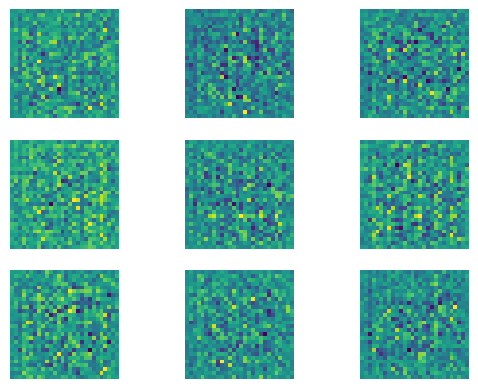

In [27]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x[i])
    plt.axis('off')
plt.show()

Again just to check our discriminator model is working and is in sync with other function below 4 cells do not contribe to the goal.

In [28]:
#checking purpose only not main
def train_discriminator(d_model,dataset,n_iter,g_model,n_batch=128):
    ns=int(n_batch/2)
    for i in range(n_iter):
        xreal,yreal=generate_real_images(ns)
        _,real_accu=d_model.train_on_batch(xreal,yreal)
        xfake,yfake=generate_fake_images(ns,g_model)
        _,fake_accu=d_model.train_on_batch(xfake,yfake)
        print('iteration',i,"--accuracy on real=",real_accu,"--accuracy on fake=",fake_accu)

In [29]:
# d_model.train_on_batch(xtrain[[i for i in range(1000)]],np.ones((1000,1)))

In [30]:
# d_model.predict(x)

In [31]:
# train_discriminator(d_model,xtrain,10,g_model,n_batch=128)

FINALLY, i got here. To the actual root of problem and it looks so simple, hiding such complexities i went throuh just boils my blood and sweat, the gan_model .
Just combinationof both generator and discriminator where  d_model.trainable=False i.e only train generator model.

In [32]:
def gan_model(g_model,d_model):
    d_model.trainable=False
    model=Sequential()
    model.add(g_model)
    model.add(d_model)
    opt=Adam(0.0002,beta_1=0.5)
    model.compile(loss="binary_crossentropy",optimizer=opt,metrics=["accuracy"])
    return model

In [33]:
ganmodel=gan_model(g_model,d_model)
ganmodel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 28, 28, 1)         3044609   
                                                                 
 sequential (Sequential)     (None, 1)                 117697    
                                                                 
Total params: 3162306 (12.06 MB)
Trainable params: 3043713 (11.61 MB)
Non-trainable params: 118593 (463.25 KB)
_________________________________________________________________


The last thing left just to train the gan_model.

I found on internet people using 2 for loops one for epochs and other nested for the no of batches. 
But i don' t see them using the i or j anywhere so it should not actually matter since inside both loops what 
gets used is the batch_size.
We will use batch size as a number to feed our models bit by bit.
        
    
                      batch_size broken into
                       |                |
        Real_images + fake_images     generated images
        iam to learn                   iam to correct

The triaining function will take epochs as no of iterations , no of times the traingin  will go through.
We will generte some real images from above mentioned function and use train_on_batch() function in tensorflow to
train in small chunks.

**WE will use the get_latent_points function to get fake images and i remember making this mistake pass 1's
as labels with to ganmodel this time becuase we are trying to fool it.**

In [34]:
def final_train(g_model,d_model,gan_model,dataset,latent_dim=100,epochs=3000,batch_no=300,batch_size=128):
    # no_per_batch=int(dataset.shape[0]/batch_no)
    half_batch=int(batch_size/2)
    ns=int(half_batch/2)
    for i in range(epochs):
        xreal,yreal=generate_real_images(ns)
        real_loss,real_accu=d_model.train_on_batch(xreal,yreal)
        xfake,yfake=generate_fake_images(ns,g_model)
        fake_loss,fake_accu=d_model.train_on_batch(xfake,yfake)
        x=get_latent_points(half_batch,latent_dim)
        y=np.ones((half_batch,1))
        loss,gan_acu=ganmodel.train_on_batch(x,y)
        if(i%20==0):
            print('iteration',i,"--loss on real train data=",real_loss,"--loss on fake train data=",fake_loss," gan accuracy=",gan_acu)
        if(i%100==0):
            # print("---------------------------------------------------------------------------------------------------------------------")
            xreal2,yreal2=generate_real_images(ns)
            _,real_accu2=d_model.evaluate(xreal2,yreal2,verbose=0)
            xfake2,yfake2=generate_fake_images(ns,g_model)
            _,fake_accu2=d_model.evaluate(xfake2,yfake2,verbose=0)
            print("accuracy on real test data=",real_accu2," on fake test data",fake_accu2)
            p(i)
            # print("---------------------------------------------------------------------------------------------------------------------")

Below is just a fuction to generate fake image time to time to check and can save the plots to visualize the changes. 

In [35]:
def p(z):
    x,y=generate_fake_images(49,g_model)
    for i in range(49):
        plt.subplot(7,7,i+1)
        plt.imshow(x[i])
        plt.axis('off')
    plt.savefig(f"plotat{z}.png")
    plt.show()

2024-01-29 20:06:47.012102: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1/1 [==============================] - 0s 205ms/step


2024-01-29 20:06:50.750528: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/sequential_1/dropout_3/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


iteration 0 --loss on real train data= 0.8044975996017456 --loss on fake train data= 0.6931807994842529  gan accuracy= 0.28125
1/1 [==============================] - 0s 17ms/step
accuracy on real test data= 0.34375  on fake test data 0.40625
2/2 [==============================] - 0s 82ms/step


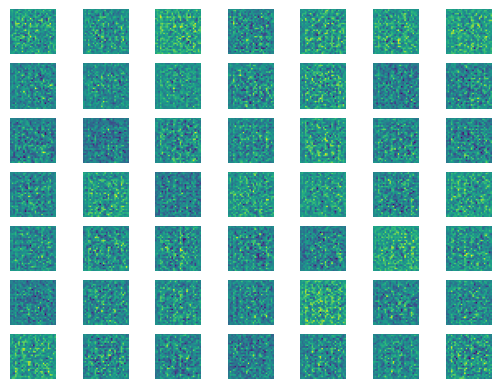

1/1 [==============================] - 0s 18ms/step
iteration 20 --loss on real train data= 0.08062232285737991 --loss on fake train data= 0.9343924522399902  gan accuracy= 1.0
1/1 [==============================] - 0s 17ms/step
iteration 40 --loss on real train data= 0.06982652842998505 --loss on fake train data= 0.13370931148529053  gan accuracy= 1.0
1/1 [==============================] - 0s 22ms/step
iteration 60 --loss on real train data= 0.09630070626735687 --loss on fake train data= 0.0217824075371027  gan accuracy= 1.0
1/1 [==============================] - 0s 17ms/step
iteration 80 --loss on real train data= 0.002816180232912302 --loss on fake train data= 0.0048681506887078285  gan accuracy= 1.0
1/1 [==============================] - 0s 18ms/step
iteration 100 --loss on real train data= 0.001858879579231143 --loss on fake train data= 0.005273329559713602  gan accuracy= 1.0
1/1 [==============================] - 0s 19ms/step
accuracy on real test data= 0.96875  on fake test data

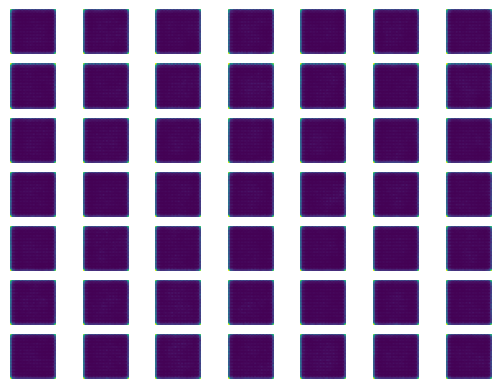

1/1 [==============================] - 0s 17ms/step
iteration 120 --loss on real train data= 0.00039877809467725456 --loss on fake train data= 0.0022338100243359804  gan accuracy= 1.0
1/1 [==============================] - 0s 16ms/step
iteration 140 --loss on real train data= 2.9740658646915108e-05 --loss on fake train data= 0.002781772520393133  gan accuracy= 1.0
1/1 [==============================] - 0s 17ms/step
iteration 160 --loss on real train data= 2.5207908038282767e-05 --loss on fake train data= 0.0008266391232609749  gan accuracy= 1.0
1/1 [==============================] - 0s 18ms/step
iteration 180 --loss on real train data= 9.491221135249361e-05 --loss on fake train data= 0.002189383376389742  gan accuracy= 1.0
1/1 [==============================] - 0s 17ms/step
iteration 200 --loss on real train data= 1.3787947636956233e-06 --loss on fake train data= 0.014093758538365364  gan accuracy= 1.0
1/1 [==============================] - 0s 17ms/step
accuracy on real test data= 1.0 

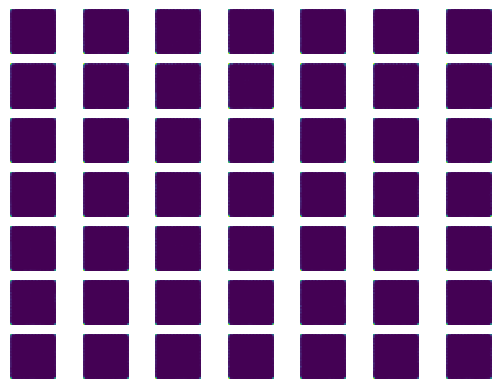

1/1 [==============================] - 0s 17ms/step
iteration 220 --loss on real train data= 0.00018992046534549445 --loss on fake train data= 0.0010714801028370857  gan accuracy= 1.0
1/1 [==============================] - 0s 17ms/step
iteration 240 --loss on real train data= 7.904496669652872e-06 --loss on fake train data= 0.0003553636197466403  gan accuracy= 1.0
1/1 [==============================] - 0s 17ms/step
iteration 260 --loss on real train data= 2.4868748369044624e-05 --loss on fake train data= 0.0023876894265413284  gan accuracy= 1.0
1/1 [==============================] - 0s 17ms/step
iteration 280 --loss on real train data= 0.004204892087727785 --loss on fake train data= 0.0004977117059752345  gan accuracy= 1.0
1/1 [==============================] - 0s 17ms/step
iteration 300 --loss on real train data= 0.004578444175422192 --loss on fake train data= 0.0003100587346125394  gan accuracy= 1.0
1/1 [==============================] - 0s 17ms/step
accuracy on real test data= 1.0  

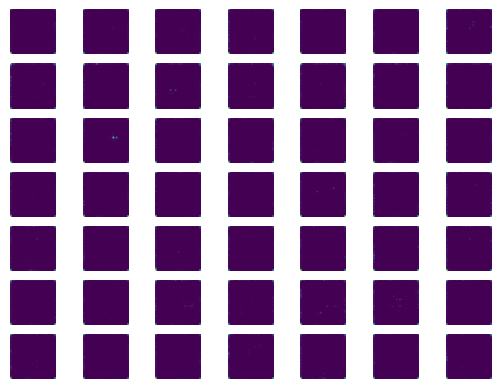

1/1 [==============================] - 0s 17ms/step
iteration 320 --loss on real train data= 2.3899362986412598e-06 --loss on fake train data= 0.00028283457504585385  gan accuracy= 1.0
1/1 [==============================] - 0s 17ms/step
iteration 340 --loss on real train data= 9.988765668822452e-06 --loss on fake train data= 0.00023290023091249168  gan accuracy= 1.0
1/1 [==============================] - 0s 16ms/step
iteration 360 --loss on real train data= 1.8287722696186393e-06 --loss on fake train data= 0.0004194382927380502  gan accuracy= 1.0
1/1 [==============================] - 0s 17ms/step
iteration 380 --loss on real train data= 3.66809240404109e-06 --loss on fake train data= 0.00013617798686027527  gan accuracy= 1.0
1/1 [==============================] - 0s 18ms/step
iteration 400 --loss on real train data= 2.2379767870006617e-06 --loss on fake train data= 7.491499127354473e-05  gan accuracy= 1.0
1/1 [==============================] - 0s 18ms/step
accuracy on real test data= 

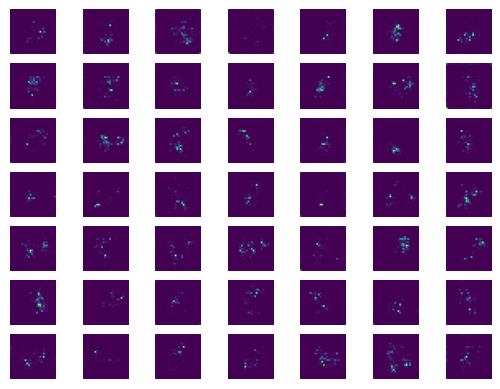

1/1 [==============================] - 0s 18ms/step
iteration 420 --loss on real train data= 0.0041756113059818745 --loss on fake train data= 9.54655697569251e-05  gan accuracy= 1.0
1/1 [==============================] - 0s 16ms/step
iteration 440 --loss on real train data= 0.04191398248076439 --loss on fake train data= 0.20210911333560944  gan accuracy= 1.0
1/1 [==============================] - 0s 17ms/step
iteration 460 --loss on real train data= 0.06776411086320877 --loss on fake train data= 0.05769228935241699  gan accuracy= 1.0
1/1 [==============================] - 0s 19ms/step
iteration 480 --loss on real train data= 2.662998676300049 --loss on fake train data= 5.444342136383057  gan accuracy= 0.96875
1/1 [==============================] - 0s 16ms/step
iteration 500 --loss on real train data= 0.11141575127840042 --loss on fake train data= 0.14455024898052216  gan accuracy= 0.203125
1/1 [==============================] - 0s 17ms/step
accuracy on real test data= 1.0  on fake test

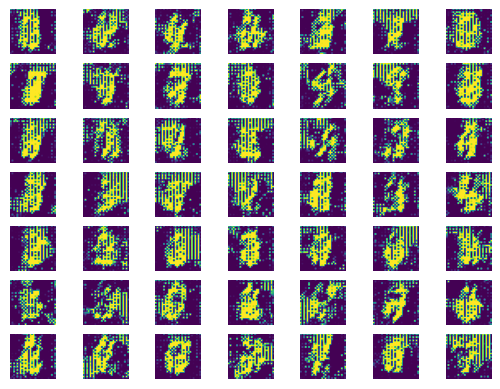

1/1 [==============================] - 0s 20ms/step
iteration 520 --loss on real train data= 0.27646604180336 --loss on fake train data= 0.24881280958652496  gan accuracy= 0.296875
1/1 [==============================] - 0s 16ms/step
iteration 540 --loss on real train data= 0.6933644413948059 --loss on fake train data= 0.8587945103645325  gan accuracy= 0.28125
1/1 [==============================] - 0s 17ms/step
iteration 560 --loss on real train data= 0.6874258518218994 --loss on fake train data= 0.7810888886451721  gan accuracy= 0.9375
1/1 [==============================] - 0s 16ms/step
iteration 580 --loss on real train data= 0.6043108701705933 --loss on fake train data= 0.6033039689064026  gan accuracy= 0.96875
1/1 [==============================] - 0s 17ms/step
iteration 600 --loss on real train data= 0.5518139600753784 --loss on fake train data= 0.5636060833930969  gan accuracy= 0.96875
1/1 [==============================] - 0s 19ms/step
accuracy on real test data= 0.96875  on fake

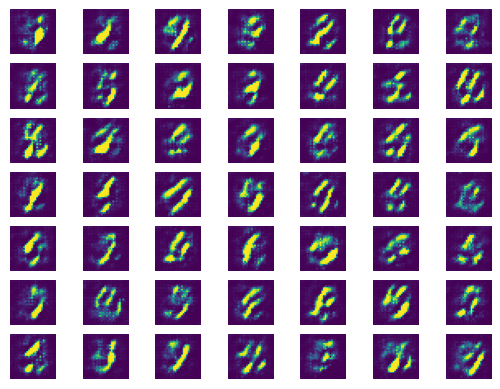

1/1 [==============================] - 0s 17ms/step
iteration 620 --loss on real train data= 0.5149015784263611 --loss on fake train data= 0.5732729434967041  gan accuracy= 1.0
1/1 [==============================] - 0s 18ms/step
iteration 640 --loss on real train data= 0.5392247438430786 --loss on fake train data= 0.5067699551582336  gan accuracy= 1.0
1/1 [==============================] - 0s 19ms/step
iteration 660 --loss on real train data= 0.7072240710258484 --loss on fake train data= 0.6456371545791626  gan accuracy= 0.1875
1/1 [==============================] - 0s 18ms/step
iteration 680 --loss on real train data= 0.7138251066207886 --loss on fake train data= 0.822755753993988  gan accuracy= 0.21875
1/1 [==============================] - 0s 18ms/step
iteration 700 --loss on real train data= 0.6317027807235718 --loss on fake train data= 0.6928706169128418  gan accuracy= 0.21875
1/1 [==============================] - 0s 19ms/step
accuracy on real test data= 0.90625  on fake test dat

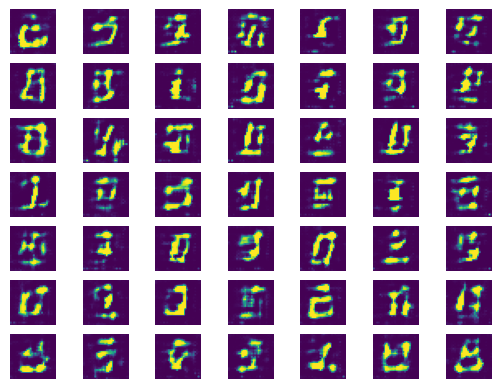

1/1 [==============================] - 0s 17ms/step
iteration 720 --loss on real train data= 0.726986289024353 --loss on fake train data= 0.5745817422866821  gan accuracy= 0.171875
1/1 [==============================] - 0s 20ms/step
iteration 740 --loss on real train data= 0.7094613909721375 --loss on fake train data= 0.6296337842941284  gan accuracy= 0.21875
1/1 [==============================] - 0s 19ms/step
iteration 760 --loss on real train data= 0.6497724652290344 --loss on fake train data= 0.521136462688446  gan accuracy= 0.0625
1/1 [==============================] - 0s 18ms/step
iteration 780 --loss on real train data= 0.698915958404541 --loss on fake train data= 0.7066805362701416  gan accuracy= 0.28125
1/1 [==============================] - 0s 17ms/step
iteration 800 --loss on real train data= 0.6044721603393555 --loss on fake train data= 0.5265162587165833  gan accuracy= 0.078125
1/1 [==============================] - 0s 20ms/step
accuracy on real test data= 0.84375  on fake 

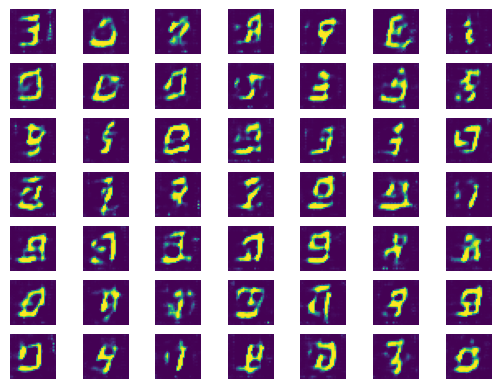

1/1 [==============================] - 0s 19ms/step
iteration 820 --loss on real train data= 0.6619832515716553 --loss on fake train data= 0.6660343408584595  gan accuracy= 0.140625
1/1 [==============================] - 0s 19ms/step
iteration 840 --loss on real train data= 0.7057239413261414 --loss on fake train data= 0.6329030990600586  gan accuracy= 0.109375
1/1 [==============================] - 0s 20ms/step
iteration 860 --loss on real train data= 0.6461836099624634 --loss on fake train data= 0.6984574794769287  gan accuracy= 0.21875
1/1 [==============================] - 0s 20ms/step
iteration 880 --loss on real train data= 0.6398332118988037 --loss on fake train data= 0.7554872035980225  gan accuracy= 0.28125
1/1 [==============================] - 0s 19ms/step
iteration 900 --loss on real train data= 0.6353774070739746 --loss on fake train data= 0.6928143501281738  gan accuracy= 0.1875
1/1 [==============================] - 0s 18ms/step
accuracy on real test data= 0.84375  on fa

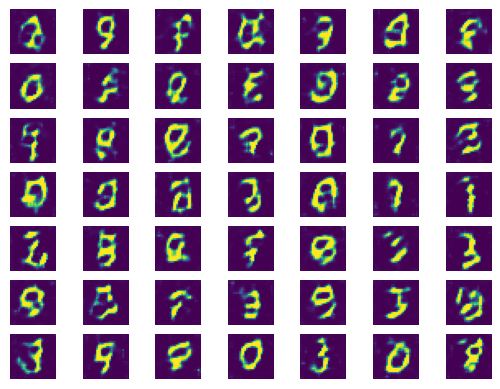

1/1 [==============================] - 0s 17ms/step
iteration 920 --loss on real train data= 0.6454929709434509 --loss on fake train data= 0.7169029712677002  gan accuracy= 0.28125
1/1 [==============================] - 0s 19ms/step
iteration 940 --loss on real train data= 0.6145989894866943 --loss on fake train data= 0.6923537850379944  gan accuracy= 0.375
1/1 [==============================] - 0s 18ms/step
iteration 960 --loss on real train data= 0.6599217653274536 --loss on fake train data= 0.7010038495063782  gan accuracy= 0.328125
1/1 [==============================] - 0s 17ms/step
iteration 980 --loss on real train data= 0.6699867248535156 --loss on fake train data= 0.6513775587081909  gan accuracy= 0.234375
1/1 [==============================] - 0s 18ms/step
iteration 1000 --loss on real train data= 0.660774290561676 --loss on fake train data= 0.7495734691619873  gan accuracy= 0.28125
1/1 [==============================] - 0s 17ms/step
accuracy on real test data= 0.65625  on fak

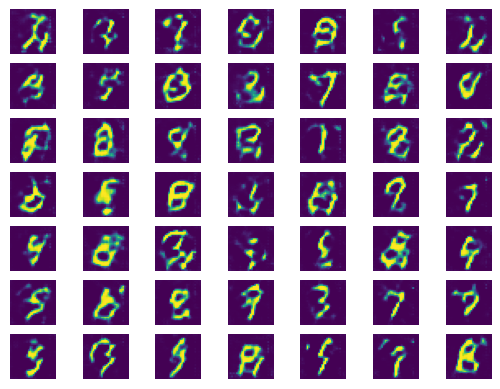

1/1 [==============================] - 0s 16ms/step
iteration 1020 --loss on real train data= 0.6677387952804565 --loss on fake train data= 0.6649893522262573  gan accuracy= 0.265625
1/1 [==============================] - 0s 18ms/step
iteration 1040 --loss on real train data= 0.6953057646751404 --loss on fake train data= 0.7244951128959656  gan accuracy= 0.34375
1/1 [==============================] - 0s 19ms/step
iteration 1060 --loss on real train data= 0.6783358454704285 --loss on fake train data= 0.6758162379264832  gan accuracy= 0.1875
1/1 [==============================] - 0s 18ms/step
iteration 1080 --loss on real train data= 0.6694368720054626 --loss on fake train data= 0.6882440447807312  gan accuracy= 0.25
1/1 [==============================] - 0s 16ms/step
iteration 1100 --loss on real train data= 0.6548131704330444 --loss on fake train data= 0.6730347871780396  gan accuracy= 0.171875
1/1 [==============================] - 0s 17ms/step
accuracy on real test data= 0.71875  on 

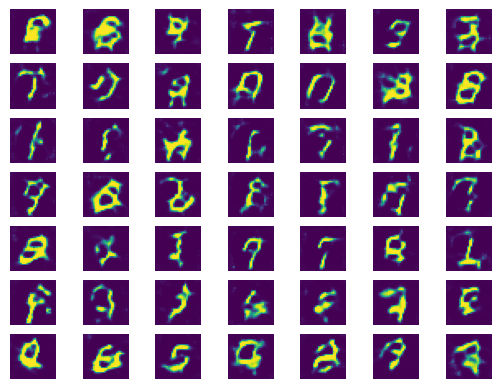

1/1 [==============================] - 0s 16ms/step
iteration 1120 --loss on real train data= 0.7344976663589478 --loss on fake train data= 0.702739953994751  gan accuracy= 0.1875
1/1 [==============================] - 0s 17ms/step
iteration 1140 --loss on real train data= 0.6522809863090515 --loss on fake train data= 0.6593272686004639  gan accuracy= 0.1875
1/1 [==============================] - 0s 17ms/step
iteration 1160 --loss on real train data= 0.6712038516998291 --loss on fake train data= 0.7786645293235779  gan accuracy= 0.296875
1/1 [==============================] - 0s 18ms/step
iteration 1180 --loss on real train data= 0.6448739171028137 --loss on fake train data= 0.749315619468689  gan accuracy= 0.265625
1/1 [==============================] - 0s 17ms/step
iteration 1200 --loss on real train data= 0.6592299342155457 --loss on fake train data= 0.6943669319152832  gan accuracy= 0.28125
1/1 [==============================] - 0s 16ms/step
accuracy on real test data= 0.6875  on f

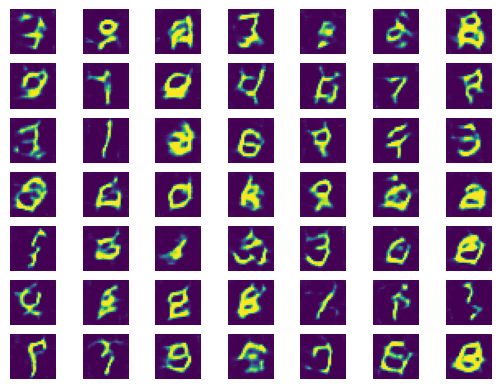

1/1 [==============================] - 0s 17ms/step
iteration 1220 --loss on real train data= 0.7283187508583069 --loss on fake train data= 0.6937690377235413  gan accuracy= 0.265625
1/1 [==============================] - 0s 16ms/step
iteration 1240 --loss on real train data= 0.7645119428634644 --loss on fake train data= 0.7372952103614807  gan accuracy= 0.203125
1/1 [==============================] - 0s 20ms/step
iteration 1260 --loss on real train data= 0.6712151765823364 --loss on fake train data= 0.7308248281478882  gan accuracy= 0.375
1/1 [==============================] - 0s 16ms/step
iteration 1280 --loss on real train data= 0.6592851877212524 --loss on fake train data= 0.7141406536102295  gan accuracy= 0.3125
1/1 [==============================] - 0s 19ms/step
iteration 1300 --loss on real train data= 0.6935464143753052 --loss on fake train data= 0.7245224714279175  gan accuracy= 0.265625
1/1 [==============================] - 0s 17ms/step
accuracy on real test data= 0.78125  o

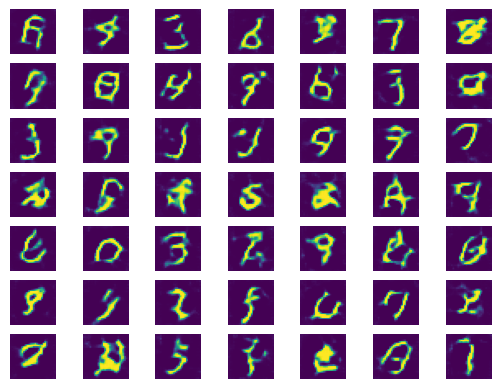

1/1 [==============================] - 0s 17ms/step
iteration 1320 --loss on real train data= 0.7321061491966248 --loss on fake train data= 0.7230846881866455  gan accuracy= 0.34375
1/1 [==============================] - 0s 16ms/step
iteration 1340 --loss on real train data= 0.6743494272232056 --loss on fake train data= 0.6674585342407227  gan accuracy= 0.28125
1/1 [==============================] - 0s 17ms/step
iteration 1360 --loss on real train data= 0.703040361404419 --loss on fake train data= 0.6326717734336853  gan accuracy= 0.453125
1/1 [==============================] - 0s 17ms/step
iteration 1380 --loss on real train data= 0.7092317938804626 --loss on fake train data= 0.7146471738815308  gan accuracy= 0.328125
1/1 [==============================] - 0s 18ms/step
iteration 1400 --loss on real train data= 0.6987683773040771 --loss on fake train data= 0.7607494592666626  gan accuracy= 0.28125
1/1 [==============================] - 0s 18ms/step
accuracy on real test data= 0.6875  o

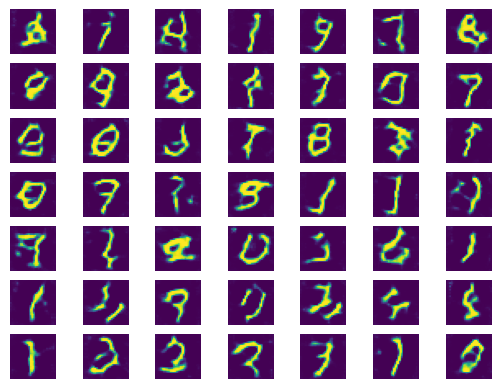

1/1 [==============================] - 0s 18ms/step
iteration 1420 --loss on real train data= 0.7311306595802307 --loss on fake train data= 0.6850674152374268  gan accuracy= 0.359375
1/1 [==============================] - 0s 18ms/step
iteration 1440 --loss on real train data= 0.713451087474823 --loss on fake train data= 0.6630823612213135  gan accuracy= 0.296875
1/1 [==============================] - 0s 16ms/step
iteration 1460 --loss on real train data= 0.6230323314666748 --loss on fake train data= 0.7329699993133545  gan accuracy= 0.265625
1/1 [==============================] - 0s 18ms/step
iteration 1480 --loss on real train data= 0.7223479151725769 --loss on fake train data= 0.6551169157028198  gan accuracy= 0.203125
1/1 [==============================] - 0s 18ms/step
iteration 1500 --loss on real train data= 0.6825167536735535 --loss on fake train data= 0.7174798846244812  gan accuracy= 0.28125
1/1 [==============================] - 0s 16ms/step
accuracy on real test data= 0.5625 

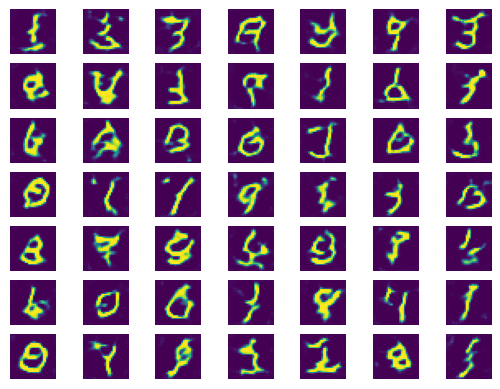

1/1 [==============================] - 0s 19ms/step
iteration 1520 --loss on real train data= 0.7000845670700073 --loss on fake train data= 0.7483823299407959  gan accuracy= 0.21875
1/1 [==============================] - 0s 17ms/step
iteration 1540 --loss on real train data= 0.6834445595741272 --loss on fake train data= 0.714064359664917  gan accuracy= 0.40625
1/1 [==============================] - 0s 17ms/step
iteration 1560 --loss on real train data= 0.672765851020813 --loss on fake train data= 0.7195881009101868  gan accuracy= 0.375
1/1 [==============================] - 0s 17ms/step
iteration 1580 --loss on real train data= 0.6948171257972717 --loss on fake train data= 0.713653564453125  gan accuracy= 0.25
1/1 [==============================] - 0s 17ms/step
iteration 1600 --loss on real train data= 0.6979848742485046 --loss on fake train data= 0.7022823691368103  gan accuracy= 0.359375
1/1 [==============================] - 0s 17ms/step
accuracy on real test data= 0.65625  on fake 

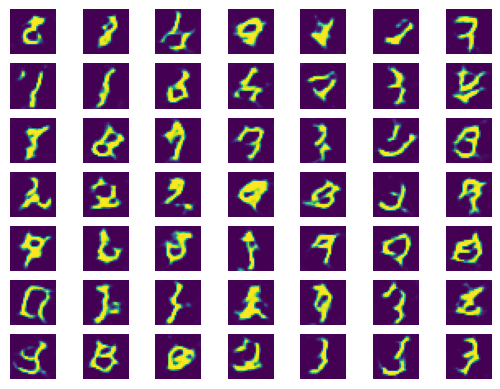

1/1 [==============================] - 0s 17ms/step
iteration 1620 --loss on real train data= 0.7276594638824463 --loss on fake train data= 0.7037050724029541  gan accuracy= 0.3125
1/1 [==============================] - 0s 16ms/step
iteration 1640 --loss on real train data= 0.6990549564361572 --loss on fake train data= 0.6844381093978882  gan accuracy= 0.296875
1/1 [==============================] - 0s 19ms/step
iteration 1660 --loss on real train data= 0.6569424867630005 --loss on fake train data= 0.6999585628509521  gan accuracy= 0.328125
1/1 [==============================] - 0s 17ms/step
iteration 1680 --loss on real train data= 0.6920923590660095 --loss on fake train data= 0.7257506847381592  gan accuracy= 0.296875
1/1 [==============================] - 0s 16ms/step
iteration 1700 --loss on real train data= 0.6786330938339233 --loss on fake train data= 0.6951503157615662  gan accuracy= 0.28125
1/1 [==============================] - 0s 17ms/step
accuracy on real test data= 0.5625  

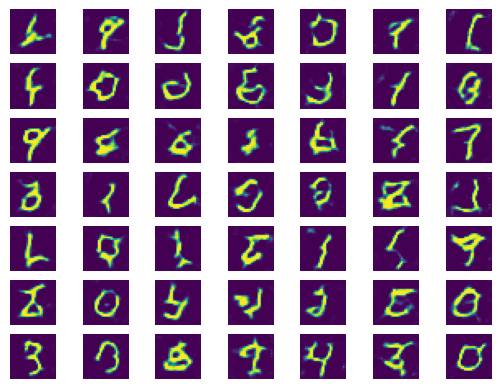

1/1 [==============================] - 0s 17ms/step
iteration 1720 --loss on real train data= 0.6432140469551086 --loss on fake train data= 0.7127190828323364  gan accuracy= 0.296875
1/1 [==============================] - 0s 19ms/step
iteration 1740 --loss on real train data= 0.6795307397842407 --loss on fake train data= 0.7004784941673279  gan accuracy= 0.28125
1/1 [==============================] - 0s 20ms/step
iteration 1760 --loss on real train data= 0.7120779752731323 --loss on fake train data= 0.7279651165008545  gan accuracy= 0.34375
1/1 [==============================] - 0s 19ms/step
iteration 1780 --loss on real train data= 0.6665409207344055 --loss on fake train data= 0.6948803067207336  gan accuracy= 0.296875
1/1 [==============================] - 0s 20ms/step
iteration 1800 --loss on real train data= 0.6739716529846191 --loss on fake train data= 0.7432385683059692  gan accuracy= 0.40625
1/1 [==============================] - 0s 21ms/step
accuracy on real test data= 0.75  on

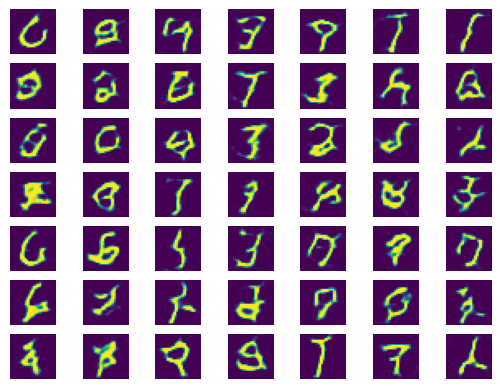

1/1 [==============================] - 0s 18ms/step
iteration 1820 --loss on real train data= 0.7257611751556396 --loss on fake train data= 0.7167245745658875  gan accuracy= 0.265625
1/1 [==============================] - 0s 18ms/step
iteration 1840 --loss on real train data= 0.7133535146713257 --loss on fake train data= 0.7164596319198608  gan accuracy= 0.3125
1/1 [==============================] - 0s 18ms/step
iteration 1860 --loss on real train data= 0.6618320941925049 --loss on fake train data= 0.7107870578765869  gan accuracy= 0.453125
1/1 [==============================] - 0s 18ms/step
iteration 1880 --loss on real train data= 0.6986607313156128 --loss on fake train data= 0.7157887816429138  gan accuracy= 0.28125
1/1 [==============================] - 0s 19ms/step
iteration 1900 --loss on real train data= 0.7064010500907898 --loss on fake train data= 0.677609920501709  gan accuracy= 0.296875
1/1 [==============================] - 0s 16ms/step
accuracy on real test data= 0.75  on 

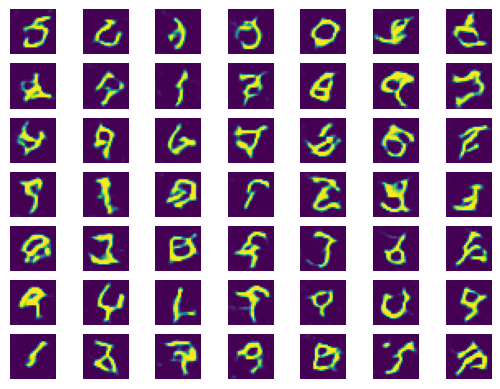

1/1 [==============================] - 0s 20ms/step
iteration 1920 --loss on real train data= 0.7285363674163818 --loss on fake train data= 0.6988650560379028  gan accuracy= 0.28125
1/1 [==============================] - 0s 20ms/step
iteration 1940 --loss on real train data= 0.6912193894386292 --loss on fake train data= 0.7102895379066467  gan accuracy= 0.390625
1/1 [==============================] - 0s 19ms/step
iteration 1960 --loss on real train data= 0.6970363259315491 --loss on fake train data= 0.6956193447113037  gan accuracy= 0.34375
1/1 [==============================] - 0s 21ms/step
iteration 1980 --loss on real train data= 0.7181837558746338 --loss on fake train data= 0.7077917456626892  gan accuracy= 0.265625
1/1 [==============================] - 0s 18ms/step
iteration 2000 --loss on real train data= 0.6990903615951538 --loss on fake train data= 0.680385947227478  gan accuracy= 0.203125
1/1 [==============================] - 0s 19ms/step
accuracy on real test data= 0.6875  

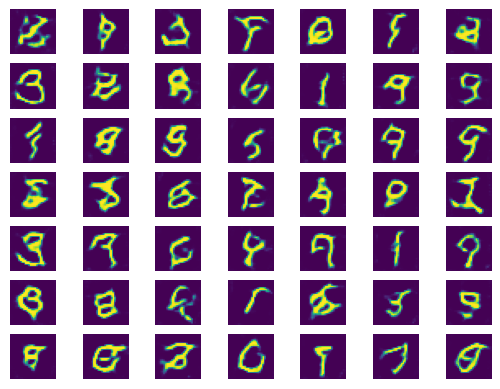

1/1 [==============================] - 0s 20ms/step
iteration 2020 --loss on real train data= 0.7136534452438354 --loss on fake train data= 0.6972906589508057  gan accuracy= 0.28125
1/1 [==============================] - 0s 21ms/step
iteration 2040 --loss on real train data= 0.7026140689849854 --loss on fake train data= 0.6994278430938721  gan accuracy= 0.3125
1/1 [==============================] - 0s 19ms/step
iteration 2060 --loss on real train data= 0.6737781167030334 --loss on fake train data= 0.730917751789093  gan accuracy= 0.28125
1/1 [==============================] - 0s 17ms/step
iteration 2080 --loss on real train data= 0.690731942653656 --loss on fake train data= 0.7008439302444458  gan accuracy= 0.28125
1/1 [==============================] - 0s 19ms/step
iteration 2100 --loss on real train data= 0.6892313361167908 --loss on fake train data= 0.7182271480560303  gan accuracy= 0.3125
1/1 [==============================] - 0s 19ms/step
accuracy on real test data= 0.625  on fake

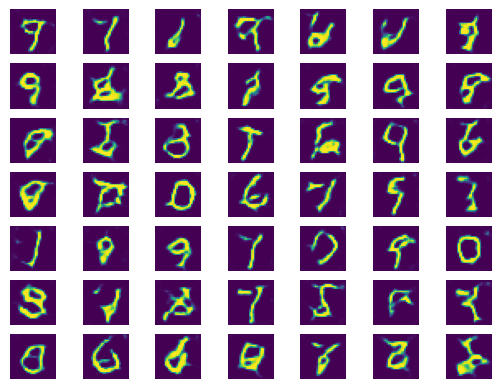

1/1 [==============================] - 0s 18ms/step
iteration 2120 --loss on real train data= 0.7035331130027771 --loss on fake train data= 0.7294960618019104  gan accuracy= 0.34375
1/1 [==============================] - 0s 19ms/step
iteration 2140 --loss on real train data= 0.688482403755188 --loss on fake train data= 0.7017685174942017  gan accuracy= 0.265625
1/1 [==============================] - 0s 18ms/step
iteration 2160 --loss on real train data= 0.673804521560669 --loss on fake train data= 0.7529411911964417  gan accuracy= 0.453125
1/1 [==============================] - 0s 20ms/step
iteration 2180 --loss on real train data= 0.6669977307319641 --loss on fake train data= 0.7046604156494141  gan accuracy= 0.359375
1/1 [==============================] - 0s 20ms/step
iteration 2200 --loss on real train data= 0.6951905488967896 --loss on fake train data= 0.7041383981704712  gan accuracy= 0.359375
1/1 [==============================] - 0s 18ms/step
accuracy on real test data= 0.71875 

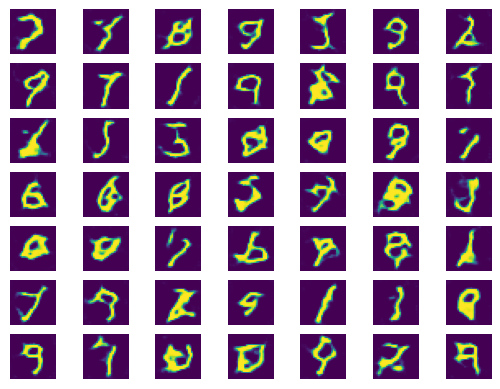

1/1 [==============================] - 0s 17ms/step
iteration 2220 --loss on real train data= 0.7084055542945862 --loss on fake train data= 0.6963486075401306  gan accuracy= 0.3125
1/1 [==============================] - 0s 18ms/step
iteration 2240 --loss on real train data= 0.6658002138137817 --loss on fake train data= 0.6854169368743896  gan accuracy= 0.296875
1/1 [==============================] - 0s 18ms/step
iteration 2260 --loss on real train data= 0.7070286273956299 --loss on fake train data= 0.7145281434059143  gan accuracy= 0.28125
1/1 [==============================] - 0s 18ms/step
iteration 2280 --loss on real train data= 0.6681709289550781 --loss on fake train data= 0.6906329393386841  gan accuracy= 0.3125
1/1 [==============================] - 0s 24ms/step
iteration 2300 --loss on real train data= 0.6941474080085754 --loss on fake train data= 0.6796607971191406  gan accuracy= 0.40625
1/1 [==============================] - 0s 20ms/step
accuracy on real test data= 0.6875  on 

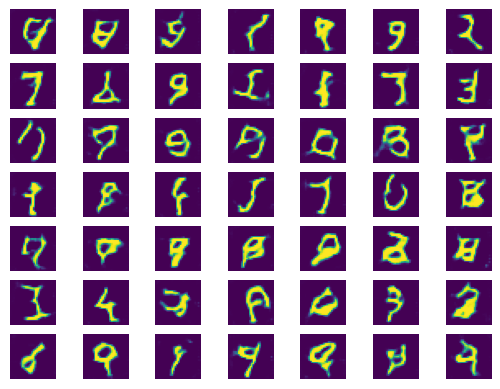

1/1 [==============================] - 0s 17ms/step
iteration 2320 --loss on real train data= 0.7004594802856445 --loss on fake train data= 0.7156475782394409  gan accuracy= 0.390625
1/1 [==============================] - 0s 17ms/step
iteration 2340 --loss on real train data= 0.6785643100738525 --loss on fake train data= 0.6839880347251892  gan accuracy= 0.3125
1/1 [==============================] - 0s 17ms/step
iteration 2360 --loss on real train data= 0.7079463601112366 --loss on fake train data= 0.698209285736084  gan accuracy= 0.296875
1/1 [==============================] - 0s 17ms/step
iteration 2380 --loss on real train data= 0.6605958938598633 --loss on fake train data= 0.7146878838539124  gan accuracy= 0.40625
1/1 [==============================] - 0s 19ms/step
iteration 2400 --loss on real train data= 0.66867995262146 --loss on fake train data= 0.6893864870071411  gan accuracy= 0.328125
1/1 [==============================] - 0s 16ms/step
accuracy on real test data= 0.59375  on

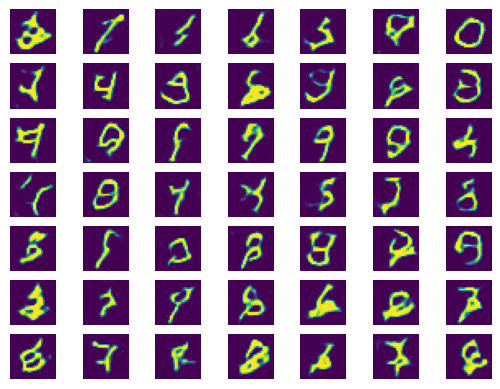

1/1 [==============================] - 0s 17ms/step
iteration 2420 --loss on real train data= 0.6993103623390198 --loss on fake train data= 0.6835591197013855  gan accuracy= 0.3125
1/1 [==============================] - 0s 18ms/step
iteration 2440 --loss on real train data= 0.6914125084877014 --loss on fake train data= 0.7075347304344177  gan accuracy= 0.3125
1/1 [==============================] - 0s 17ms/step
iteration 2460 --loss on real train data= 0.6949255466461182 --loss on fake train data= 0.7196063995361328  gan accuracy= 0.4375
1/1 [==============================] - 0s 17ms/step
iteration 2480 --loss on real train data= 0.6930066347122192 --loss on fake train data= 0.7136839032173157  gan accuracy= 0.375
1/1 [==============================] - 0s 18ms/step
iteration 2500 --loss on real train data= 0.6597406268119812 --loss on fake train data= 0.7301653027534485  gan accuracy= 0.421875
1/1 [==============================] - 0s 21ms/step
accuracy on real test data= 0.8125  on fak

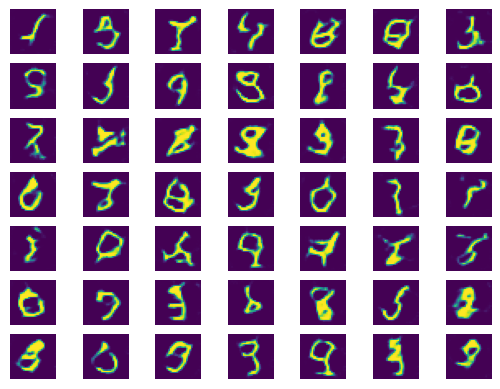

1/1 [==============================] - 0s 16ms/step
iteration 2520 --loss on real train data= 0.691156268119812 --loss on fake train data= 0.6978157758712769  gan accuracy= 0.40625
1/1 [==============================] - 0s 19ms/step
iteration 2540 --loss on real train data= 0.6829575896263123 --loss on fake train data= 0.6861402988433838  gan accuracy= 0.40625
1/1 [==============================] - 0s 18ms/step
iteration 2560 --loss on real train data= 0.698247492313385 --loss on fake train data= 0.6971946954727173  gan accuracy= 0.359375
1/1 [==============================] - 0s 20ms/step
iteration 2580 --loss on real train data= 0.7111419439315796 --loss on fake train data= 0.6988801956176758  gan accuracy= 0.375
1/1 [==============================] - 0s 17ms/step
iteration 2600 --loss on real train data= 0.6989790201187134 --loss on fake train data= 0.6872001886367798  gan accuracy= 0.359375
1/1 [==============================] - 0s 21ms/step
accuracy on real test data= 0.71875  on 

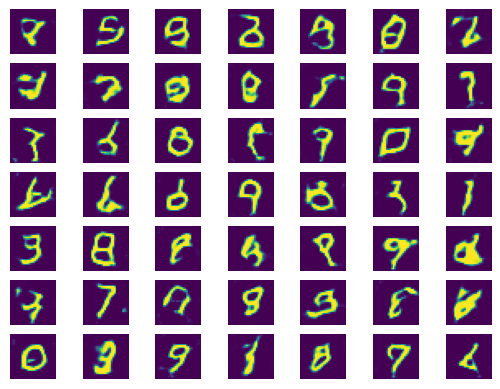

1/1 [==============================] - 0s 19ms/step
iteration 2620 --loss on real train data= 0.6751972436904907 --loss on fake train data= 0.707355260848999  gan accuracy= 0.390625
1/1 [==============================] - 0s 21ms/step
iteration 2640 --loss on real train data= 0.6763087511062622 --loss on fake train data= 0.6723862886428833  gan accuracy= 0.34375
1/1 [==============================] - 0s 20ms/step
iteration 2660 --loss on real train data= 0.6877030730247498 --loss on fake train data= 0.6926547884941101  gan accuracy= 0.359375
1/1 [==============================] - 0s 20ms/step
iteration 2680 --loss on real train data= 0.6864997148513794 --loss on fake train data= 0.6959713697433472  gan accuracy= 0.359375
1/1 [==============================] - 0s 19ms/step
iteration 2700 --loss on real train data= 0.698777437210083 --loss on fake train data= 0.6873067617416382  gan accuracy= 0.359375
1/1 [==============================] - 0s 17ms/step
accuracy on real test data= 0.625  o

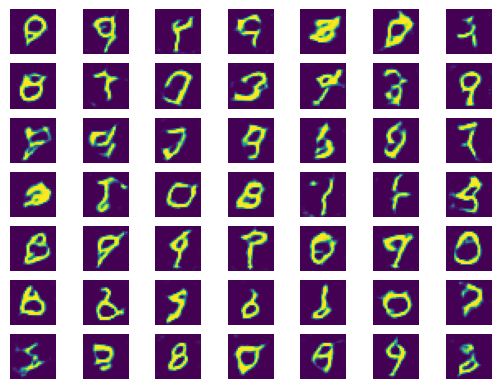

1/1 [==============================] - 0s 19ms/step
iteration 2720 --loss on real train data= 0.6971755027770996 --loss on fake train data= 0.682893693447113  gan accuracy= 0.390625
1/1 [==============================] - 0s 17ms/step
iteration 2740 --loss on real train data= 0.719846248626709 --loss on fake train data= 0.6759948134422302  gan accuracy= 0.328125
1/1 [==============================] - 0s 18ms/step
iteration 2760 --loss on real train data= 0.6889131665229797 --loss on fake train data= 0.6638754606246948  gan accuracy= 0.40625
1/1 [==============================] - 0s 18ms/step
iteration 2780 --loss on real train data= 0.6892296075820923 --loss on fake train data= 0.6991733312606812  gan accuracy= 0.375
1/1 [==============================] - 0s 18ms/step
iteration 2800 --loss on real train data= 0.698918342590332 --loss on fake train data= 0.6908969879150391  gan accuracy= 0.265625
1/1 [==============================] - 0s 18ms/step
accuracy on real test data= 0.59375  on 

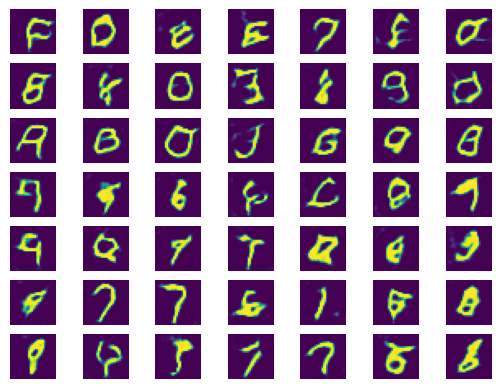

1/1 [==============================] - 0s 20ms/step
iteration 2820 --loss on real train data= 0.6652578711509705 --loss on fake train data= 0.7041146755218506  gan accuracy= 0.34375
1/1 [==============================] - 0s 20ms/step
iteration 2840 --loss on real train data= 0.6825850009918213 --loss on fake train data= 0.685874879360199  gan accuracy= 0.5
1/1 [==============================] - 0s 21ms/step
iteration 2860 --loss on real train data= 0.7114458680152893 --loss on fake train data= 0.6909856796264648  gan accuracy= 0.375
1/1 [==============================] - 0s 21ms/step
iteration 2880 --loss on real train data= 0.6851816177368164 --loss on fake train data= 0.6949111819267273  gan accuracy= 0.3125
1/1 [==============================] - 0s 21ms/step
iteration 2900 --loss on real train data= 0.705795168876648 --loss on fake train data= 0.7077634334564209  gan accuracy= 0.234375
1/1 [==============================] - 0s 20ms/step
accuracy on real test data= 0.5  on fake test 

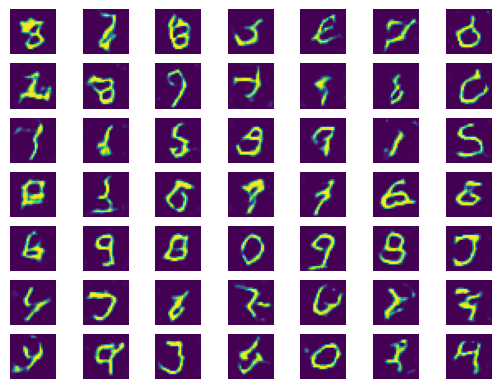

1/1 [==============================] - 0s 19ms/step
iteration 2920 --loss on real train data= 0.6931363344192505 --loss on fake train data= 0.6701852083206177  gan accuracy= 0.359375
1/1 [==============================] - 0s 21ms/step
iteration 2940 --loss on real train data= 0.6761388778686523 --loss on fake train data= 0.6951801776885986  gan accuracy= 0.421875
1/1 [==============================] - 0s 19ms/step
iteration 2960 --loss on real train data= 0.6850032806396484 --loss on fake train data= 0.689787745475769  gan accuracy= 0.390625
1/1 [==============================] - 0s 19ms/step
iteration 2980 --loss on real train data= 0.6758667230606079 --loss on fake train data= 0.6815448999404907  gan accuracy= 0.25
1/1 [==============================] - 0s 20ms/step


In [36]:
final_train(g_model,d_model,gan_model,xtrain)

2/2 [==============================] - 0s 10ms/step


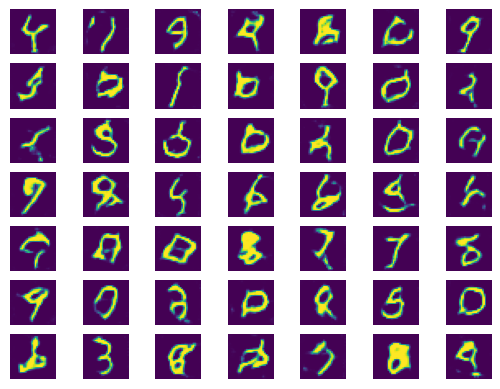

In [46]:
x,y=generate_fake_images(49,g_model)
for i in range(49):
    plt.subplot(7,7,i+1)
    plt.imshow(x[i])
    plt.axis('off')
plt.show()

Can increase epochs for better results !!

2/2 [==============================] - 0s 10ms/step


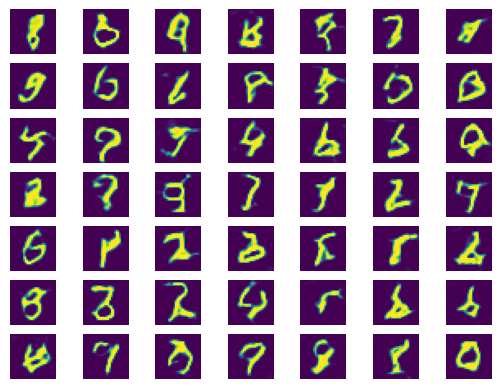

In [334]:
x,y=generate_fake_images(49,g_model)
for i in range(49):
    plt.subplot(7,7,i+1)
    plt.imshow(x[i])
    plt.axis('off')
plt.show()

In [49]:
ganmodel.save("g_model.keras")

**The two for loop varient.**

In [47]:
def final_train_v2(g_model,d_model,gan_model,dataset,latent_dim=100,epochs=5,batch_no=300,batch_size=128):
    # no_per_batch=int(dataset.shape[0]/batch_no)
    half_batch=int(batch_size/2)
    ns=int(half_batch/2)
    for i in range(epochs):
        for j in range(batch_no):
            xreal,yreal=generate_real_images(ns)
            real_loss,real_accu=d_model.train_on_batch(xreal,yreal)
            xfake,yfake=generate_fake_images(ns,g_model)
            fake_loss,fake_accu=d_model.train_on_batch(xfake,yfake)
            x=get_latent_points(half_batch,latent_dim)
            y=np.ones((half_batch,1))
            loss,gan_acu=ganmodel.train_on_batch(x,y)


In [48]:
final_train_v2(g_model,d_model,gan_model,xtrain)

1/1 [==============================] - 0s 17ms/step
